# Visualize the Data

In [115]:
import pandas as pd
import numpy as np



# Create a DataFrame
df = pd.read_csv("realistic_balanced_loan_data.csv")

pd.set_option('display.max_columns',None)
print(df.head())

   ApplicantAge  MonthlyIncome EmploymentStatus  CreditScore  LoanAmount  \
0            36          14530         Employed          770       16307   
1            43           7821         Employed          825       16088   
2            45          12332         Employed          825       26569   
3            32           6247         Employed          798       23208   
4            28          14504         Employed          750       15611   

   LoanTerm  DebtToIncomeRatio  NumberOfDependents  HasExistingLoans  \
0        48              20.74                   1                 0   
1        24              13.35                   0                 0   
2        36              13.52                   2                 0   
3        48              24.95                   1                 0   
4        36              23.42                   1                 0   

  EducationLevel MaritalStatus ResidenceType  YearsAtCurrentResidence  \
0       Bachelor        Single       

### Applying the One hot vector method

In [116]:

X = df.drop('ApprovalStatus', axis=1)
Y = df['ApprovalStatus']

# Convert categorical columns to numerical values
X['EmploymentStatus'] = X['EmploymentStatus'].apply(lambda x: 1 if x == 'Employed' else 0)
X['MaritalStatus'] = X['MaritalStatus'].apply(lambda x: 1 if x == 'Married' else 0)
X['ResidenceType'] = X['ResidenceType'].apply(lambda x: 1 if x == 'Own' else 0)
X_encoded = pd.get_dummies(X, columns=['EducationLevel'])

# Display the updated DataFrame
print(X_encoded.head())

   ApplicantAge  MonthlyIncome  EmploymentStatus  CreditScore  LoanAmount  \
0            36          14530                 1          770       16307   
1            43           7821                 1          825       16088   
2            45          12332                 1          825       26569   
3            32           6247                 1          798       23208   
4            28          14504                 1          750       15611   

   LoanTerm  DebtToIncomeRatio  NumberOfDependents  HasExistingLoans  \
0        48              20.74                   1                 0   
1        24              13.35                   0                 0   
2        36              13.52                   2                 0   
3        48              24.95                   1                 0   
4        36              23.42                   1                 0   

   MaritalStatus  ResidenceType  YearsAtCurrentResidence  \
0              0              1             

### Splitting the data and check the size 


In [117]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(X_encoded,Y,train_size=0.8,test_size=0.2,shuffle=True)
print ("X train shape: ",np.shape(x_train))
print ("y train shape: ",np.shape(y_train))
print ("x test shape: ",np.shape(x_test))
print ("y test shape: ",np.shape(y_test))



X train shape:  (800, 16)
y train shape:  (800,)
x test shape:  (200, 16)
y test shape:  (200,)


# Applying Logistic Regression Using MLP  

In [118]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout


from tensorflow.keras.losses import BinaryCrossentropy

import matplotlib.pyplot as plt
import numpy as np


model=Sequential([ 
                  #Dense( units=32,activation='relu'),
                  Dense(units=16,activation='relu'),
                  
                  Dense( units=8,activation='relu'),
                  Dense( units=1,activation='sigmoid')])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) ,
              loss='BinaryCrossentropy',
              metrics=['accuracy', 'Precision', 'Recall','mse',tf.keras.metrics.AUC(name='AUC-PR', curve='PR')])
history=model.fit(x_train,y_train,epochs=25,batch_size=30,validation_data=(x_test,y_test))

# Get raw predictions (probabilities)
y_pred_prob = model.predict(x_test)


threshold = 0.6
y_pred_class = (y_pred_prob >= threshold).astype(int)

print(y_pred_class)  





Epoch 1/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - AUC-PR: 0.5649 - Precision: 0.5067 - Recall: 0.0847 - accuracy: 0.5342 - loss: 403.5278 - mse: 0.4658 - val_AUC-PR: 0.7101 - val_Precision: 0.7063 - val_Recall: 0.9902 - val_accuracy: 0.7850 - val_loss: 49.1718 - val_mse: 0.2123
Epoch 2/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - AUC-PR: 0.7861 - Precision: 0.7914 - Recall: 0.9596 - accuracy: 0.8557 - loss: 26.4325 - mse: 0.1442 - val_AUC-PR: 0.8169 - val_Precision: 0.8214 - val_Recall: 0.9020 - val_accuracy: 0.8500 - val_loss: 11.9452 - val_mse: 0.1479
Epoch 3/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC-PR: 0.8537 - Precision: 0.8785 - Recall: 0.8688 - accuracy: 0.8755 - loss: 11.0134 - mse: 0.1239 - val_AUC-PR: 0.8078 - val_Precision: 0.8033 - val_Recall: 0.9608 - val_accuracy: 0.8600 - val_loss: 12.4935 - val_mse: 0.1396
Epoch 4/25
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC-PR: 0.8595 - Precision: 0.8792 - Recall: 0.8965 - accuracy: 0.8837 - loss: 10.2302 - mse: 0.1148 - va

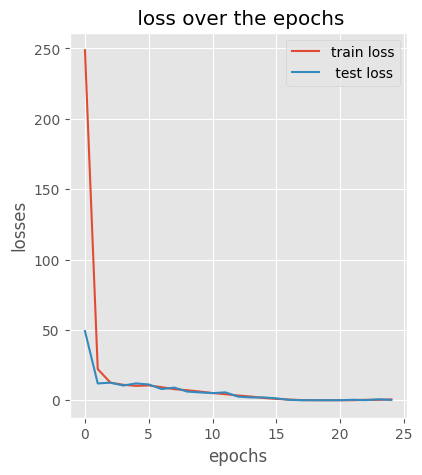

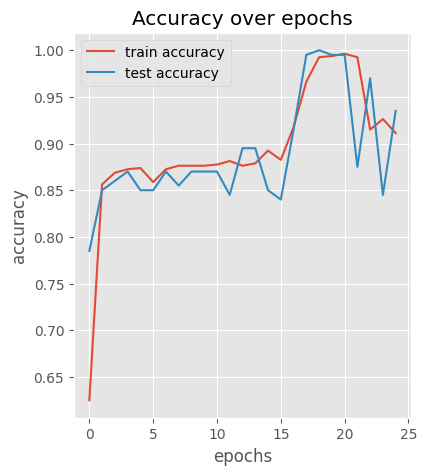

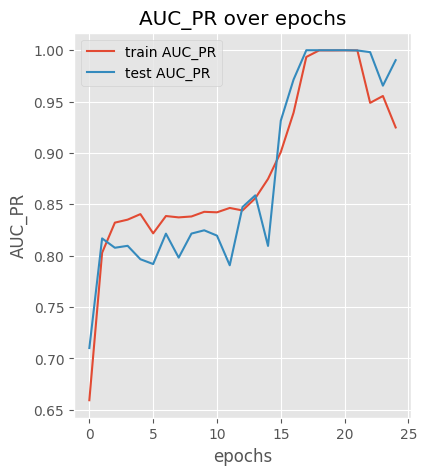

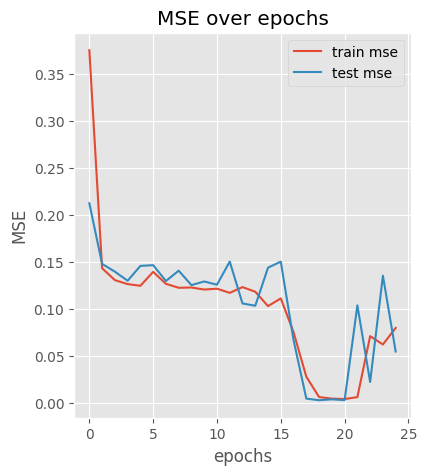

In [119]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label=' test loss')
plt.xlabel('epochs')
plt.ylabel('losses')
plt.title(" loss over the epochs")
plt.legend()
plt.show()
plt.figure(figsize=(20,5))
plt.subplot(1,4,2)
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='test accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy over epochs")
plt.legend()
plt.show()
plt.figure(figsize=(20,5))
plt.subplot(1,4,3)
plt.plot(history.history['AUC-PR'],label='train AUC_PR')
plt.plot(history.history['val_AUC-PR'],label='test AUC_PR')
plt.xlabel("epochs")
plt.ylabel("AUC_PR")
plt.title("AUC_PR over epochs")
plt.legend()
plt.show()
plt.figure(figsize=(20,5))
plt.subplot(1,4,4)
plt.plot(history.history['mse'],label='train mse')
plt.plot(history.history['val_mse'],label='test mse')
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.title("MSE over epochs")
plt.legend()
plt.show()


# Building the logistic regression from scratch


In [120]:
# intializing the weights by any random values
W=np.random.rand(x_train.shape[1],1)
B=0
print(f'weights: {W} and \n the bias: {B}')

weights: [[0.2105357 ]
 [0.98128781]
 [0.74740389]
 [0.86349189]
 [0.4303703 ]
 [0.03859493]
 [0.48853602]
 [0.20128044]
 [0.40772757]
 [0.81149405]
 [0.53790736]
 [0.90419698]
 [0.99741087]
 [0.1820856 ]
 [0.52521613]
 [0.12128928]] and 
 the bias: 0


### Feature Scaling

In [121]:
def Normalization(x):
    x_n=(x-np.mean(x,axis=0))/np.std(x,axis=0)
    return x_n

### Activation function 'Sigmoid'

In [122]:
def sigmoid(z):
   z = np.array(z, dtype=np.float64)
   z = np.clip(z, -500, 500)
   return  1/(1+np.exp(-z))

### Compute Cost Function

In [123]:
def cost_function(x,y,w,b):
    x_n=Normalization(x)
    z=np.dot(x_n,w)+b
    f_x=sigmoid(z)
    m=x_n.shape[0]
    y = np.array(y).reshape(-1, 1)
    f_x = f_x.reshape(-1,1)
    cost=np.sum(np.multiply(y,np.log(f_x))+(np.multiply(1-y,np.log(1-f_x))))
    cost*=-1/m

    return cost

fun_cost=cost_function(x_train,y_train,W,B)

print(f'the cost function for the training data before applying the gradient is equal : {fun_cost}')
    

the cost function for the training data before applying the gradient is equal : 0.25540018672232945


### Applying the Gradient Descent

In [124]:
def compute_derivative(x,y,w,b):
    m=x.shape[0]
    x_n=Normalization(x)
    z=np.dot(x,w)+b
    f_x=sigmoid(z)
    f_x=f_x.reshape(-1,1)
    y=np.array(y).reshape(-1,1)
    dw=np.dot(x_n.T,(f_x-y))
    dw/=m
    db=np.sum(f_x-y)
    db/=m

    return dw , db
print(f" the values of the dervatives equal: {compute_derivative(x_train,y_train,W,B)}")


    

 the values of the dervatives equal: (array([[ 0.01549905],
       [-0.38365452],
       [-0.32957222],
       [-0.44627725],
       [ 0.25920839],
       [ 0.01069941],
       [ 0.43201167],
       [ 0.38353699],
       [ 0.21754579],
       [-0.07632399],
       [-0.14104215],
       [-0.30929058],
       [-0.18212493],
       [ 0.38126213],
       [-0.19638543],
       [-0.11976291]]), np.float64(0.5025))


In [125]:
def compute_gradient(x,y,w,b,num_itr,alpha=0.001):
    cost=[]
    b_values=[]
    for i in range(num_itr):
        dw,db=compute_derivative(x,y,w,b)
        w=w-(alpha*dw)
        b=b-(alpha*db)
        b_values.append(b)
        cost.append(cost_function(x,y,w,b))
        if i % 1000 == 0: 
                print(f"Iteration {i}, Cost: {cost[i]}") 
                print(f"w: {w}, b: {b}")
    return cost,w,b
cost_history,w_f,b_f=(compute_gradient(x_train,y_train,W,B,10000))



            


Iteration 0, Cost: 0.2550149421729525
w: [[0.2105202 ]
 [0.98167146]
 [0.74773347]
 [0.86393817]
 [0.43011109]
 [0.03858423]
 [0.488104  ]
 [0.20089691]
 [0.40751002]
 [0.81157037]
 [0.5380484 ]
 [0.90450627]
 [0.99759299]
 [0.18170434]
 [0.52541251]
 [0.12140904]], b: -0.0005024999999999999
Iteration 1000, Cost: 0.058602985055921264
w: [[ 0.19502115]
 [ 1.36532599]
 [ 1.07730569]
 [ 1.31021542]
 [ 0.17090269]
 [ 0.02788482]
 [ 0.05609234]
 [-0.18264009]
 [ 0.18996423]
 [ 0.88789436]
 [ 0.67909055]
 [ 1.21379685]
 [ 1.17971792]
 [-0.19955779]
 [ 0.72179794]
 [ 0.24117196]], b: -0.5030025000000059
Iteration 2000, Cost: 0.015566542841733562
w: [[ 0.1795221 ]
 [ 1.74898051]
 [ 1.40687791]
 [ 1.75649266]
 [-0.0883057 ]
 [ 0.0171854 ]
 [-0.37591933]
 [-0.56617708]
 [-0.02758156]
 [ 0.96421835]
 [ 0.8201327 ]
 [ 1.52308744]
 [ 1.36184285]
 [-0.58081992]
 [ 0.91818337]
 [ 0.36093487]], b: -1.0055024999999684
Iteration 3000, Cost: 0.005846009971632894
w: [[ 0.15770189]
 [ 2.04919572]
 [ 1.6992

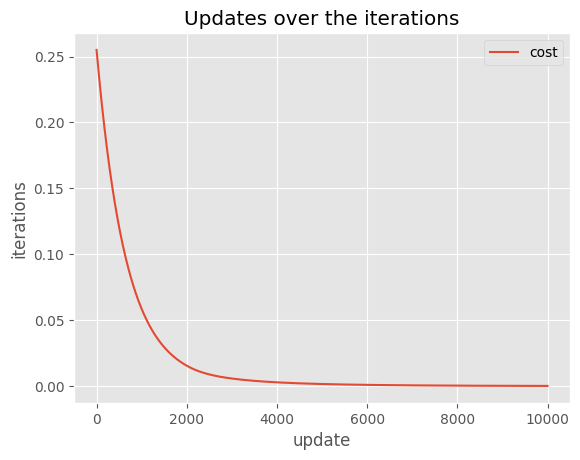

In [126]:
plt.style.use('ggplot') 
plt.plot(cost_history,label='cost')
plt.title("Updates over the iterations")
plt.xlabel('update')
plt.ylabel('iterations')
plt.legend()
plt.show()

In [127]:
def predict(x,w_p,b_p):
   
    z=np.dot(x,w_p)+b_p
    f_p=sigmoid(z)
    return (f_p >= 0.5).astype(int)
cost_h,w_final,b_final=compute_gradient(x_train,y_train,W,B,10000)
final_cost=cost_function(x_test,y_test,w_final,b_final)
print(f"the prediction of the test data : {predict(x_test,w_final,b_final)} \n and the cost is equal{final_cost}")

Iteration 0, Cost: 0.2550149421729525
w: [[0.2105202 ]
 [0.98167146]
 [0.74773347]
 [0.86393817]
 [0.43011109]
 [0.03858423]
 [0.488104  ]
 [0.20089691]
 [0.40751002]
 [0.81157037]
 [0.5380484 ]
 [0.90450627]
 [0.99759299]
 [0.18170434]
 [0.52541251]
 [0.12140904]], b: -0.0005024999999999999
Iteration 1000, Cost: 0.058602985055921264
w: [[ 0.19502115]
 [ 1.36532599]
 [ 1.07730569]
 [ 1.31021542]
 [ 0.17090269]
 [ 0.02788482]
 [ 0.05609234]
 [-0.18264009]
 [ 0.18996423]
 [ 0.88789436]
 [ 0.67909055]
 [ 1.21379685]
 [ 1.17971792]
 [-0.19955779]
 [ 0.72179794]
 [ 0.24117196]], b: -0.5030025000000059
Iteration 2000, Cost: 0.015566542841733562
w: [[ 0.1795221 ]
 [ 1.74898051]
 [ 1.40687791]
 [ 1.75649266]
 [-0.0883057 ]
 [ 0.0171854 ]
 [-0.37591933]
 [-0.56617708]
 [-0.02758156]
 [ 0.96421835]
 [ 0.8201327 ]
 [ 1.52308744]
 [ 1.36184285]
 [-0.58081992]
 [ 0.91818337]
 [ 0.36093487]], b: -1.0055024999999684
Iteration 3000, Cost: 0.005846009971632894
w: [[ 0.15770189]
 [ 2.04919572]
 [ 1.6992

# **Applying ensemble trees using XGBoost Algorithm**


In [128]:
import xgboost as xgb
classi=xgb.XGBClassifier(n_estimators=100,early_stopping_rounds=50,eval_metric=['logloss','error'],learning_rate=0.001)
classi.fit(x_train,y_train,eval_set=[(x_train,y_train),(x_test,y_test)],verbose=10)
results = classi.evals_result()


[0]	validation_0-logloss:0.69215	validation_0-error:0.49750	validation_1-logloss:0.69228	validation_1-error:0.51000
[10]	validation_0-logloss:0.68236	validation_0-error:0.00000	validation_1-logloss:0.68259	validation_1-error:0.00500
[20]	validation_0-logloss:0.67276	validation_0-error:0.00000	validation_1-logloss:0.67308	validation_1-error:0.00500
[30]	validation_0-logloss:0.66334	validation_0-error:0.00000	validation_1-logloss:0.66376	validation_1-error:0.00500
[40]	validation_0-logloss:0.65411	validation_0-error:0.00000	validation_1-logloss:0.65462	validation_1-error:0.00500
[50]	validation_0-logloss:0.64505	validation_0-error:0.00000	validation_1-logloss:0.64565	validation_1-error:0.00500
[55]	validation_0-logloss:0.64058	validation_0-error:0.00000	validation_1-logloss:0.64123	validation_1-error:0.00500


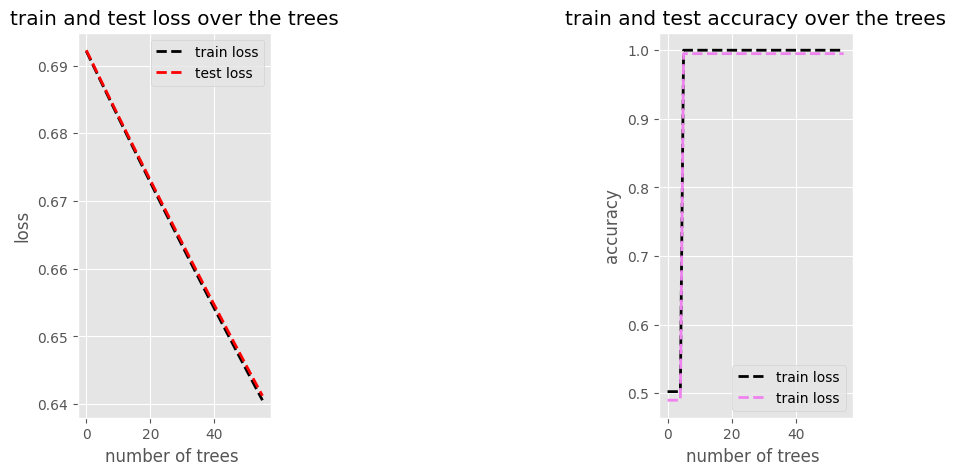

In [129]:

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(results['validation_0']['logloss'],label='train loss',color='black',linestyle='--',linewidth=2)
plt.plot(results['validation_1']['logloss'],label='test loss',color='red',linestyle='--',linewidth=2)
plt.xlabel("number of trees ")
plt.ylabel("loss")
plt.title("train and test loss over the trees")
plt.legend()

accuracy_train=1-np.array(results['validation_0']['error'])
accuracy_test=1-np.array(results['validation_1']['error'])
plt.subplot(1,2,2)
plt.plot(accuracy_train,label='train loss',color='black',linestyle='--',linewidth=2)
plt.plot(accuracy_test,label='train loss',color='violet',linestyle='--',linewidth=2)
plt.xlabel("number of trees ")
plt.ylabel("accuracy")
plt.title("train and test accuracy over the trees")
plt.legend()
plt.subplots_adjust(wspace=2)

plt.show() 

In [130]:
classi.predict(x_test)


array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1])